## Metabolic pathway ranking through multiobjective optimization

Pablo Carbonell, 2019

### Problem statement

Metabolic pathway retrosynthesis tools like RetroPath2.0 can enumerate all production pathways linking a target chemical $T$ to the host. A viable pathway is any solution to the costraint optimization problem:

$$\mathbf{S}\mathbf{v} = \mathbf{0}$$
$$v^{lb}_i \le v_i \le v^{ub}_i$$
$$v_T > 0$$

where $\mathbf{v}$ is a vector containing the set of reactions involved in the pathways (metabolic scope), see Carbonell et al. 2012 for details).

The set of pathway solutions $\mathbf{P}$ constitutes the feasible set. In order to prioritize the selection of the pathway $p$, several objectives $f_i(p)$ can be considered in a typical metabolic pathway design project: number of enzymes, enzyme efficiency, theoretical titers and yields, etc. All of these are conflicting objectives and therefore it is not possible to identify a unique solution. Classical approaches have relied in reducing the problem to a single-objective optimization problem through scalarization, i.e. converting the multiple objective function into a single scalar function for instance by a weighting sum of the objectives. However, there is no obvious way for choosing the weights.

### Non-dominated pathways and Pareto-Optimal pathways

Here we take a different approach in order to perform the ranking:

- Determine the non-dominated solutions or Pareto-optimal set. Compute the set of pathway solutions that are non-dominated by other pathways. A pathway $p_i$ is said to dominate other pathway $p_j$ if:

 - The pathway $p_i$ is not worse than $p_j$ for any objective;
 - The pathway $p_i$ is strictly better than $p_j$ for at least one objective.
 
In general, we  might be interested either in maximizing or minimizing each objective, depending on the definition of our goal.

Some useful definitions are:

- Ideal vector 
- Nadir
- Pathway normalization (using the ideal and nadir as the extreme values). After normalization, the problem becomes a minimization problem within the unit hypercube in the positive subspace.

There exist several algorithms to compute the Pareto front (see Deb, 2005). We will follow an *onion peeling strategy* where progressively the Pareto fronts are computed and removed from the set. This will provide an ordered stratification of the pathway subpopulations.


### Weigthed-sum approach

In order to rank the pathways within a Pareto set, we will use a weigthed-sum approach. In case of no preference, a global criterion will be addopted using $L_p$ metrics (Miettinen, 1998) to measure the distance to the ideal vector $z^*$. Otherwise, a preference vector can be provided and in that case the distances will be weighted accordingly.

$$ \left( \sum_i^k |f_i(p) - z^* |^p \right) ^{1/p} $$



In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from rank import init, regularization, Pareto, fronts, rank, plotRanking


#Initialize a random example for 50 pathways and 2 scores

X = init( 50,2 )
pd.DataFrame(X, columns=['Criterion 1','Criterion 2']).head()

,Criterion 1,Criterion 2
0,0.899697,0.588450
1,0.511493,1.693009
2,0.468682,0.191420
3,0.608728,1.047841
4,-0.182602,0.372746


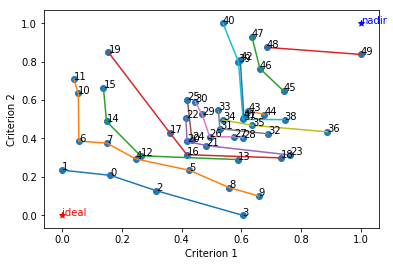

In [2]:
# Generate a weighting vector
pref = np.random.random(X.shape[1])
pref = pref/sum(pref)

# Regularize the data
Xn = regularization(X)

# Compute the Pareto fronts, if needed
Pa = Pareto(Xn)
Fr,fix = fronts(Xn)

# Rank the pathways
ranking = rank(Xn,pref)

# Visualize
plotRanking(Xn, fix, ranking)

## References

Carbonell, Pablo, et al. "Enumerating metabolic pathways for the production of heterologous target chemicals in chassis organisms." BMC systems biology 6.1 (2012): 10.

Deb, Kalyanmoy. "Multi-objective optimization." Search methodologies. Springer, Boston, MA, 2005. 273-316.

Miettinen, Kaisa. "No-preference methods." Nonlinear Multiobjective Optimization. Springer, Boston, MA, 1998. 67-76.

Monfared, M. Davoodi, A. Mohades, and J. Rezaei. "Convex hull ranking algorithm for multi-objective evolutionary algorithms." Scientia Iranica 18.6 (2011): 1435-1442.


